<a href="https://colab.research.google.com/github/ShivaniMohite1/CodeAlpha_Project_Name/blob/main/CodeAlpha_DS_Internship_3RD_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Code Alpha - Data Science Internship**

**3RD Internship Task - 1**

**Task 1 -MODEL EVALUATION**

* Evaluate the model's performance on the testing
dataset using appropriate metrics (e.g., accuracy,
precision, recall).

* Visualize the results with confusion matrices and
classification reports.List item






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/car_evaluation.csv
/content/.config/.last_update_check.json
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_opt_in_prompt.yaml
/content/.config/gce
/content/.config/default_configs.db
/content/.config/logs/2024.01.11/17.01.50.905438.log
/content/.config/logs/2024.01.11/17.01.50.107332.log
/content/.config/logs/2024.01.11/17.01.23.878355.log
/content/.config/logs/2024.01.11/17.01.40.683538.log
/content/.config/logs/2024.01.11/17.01.32.816172.log
/content/.config/logs/2024.01.11/17.00.57.357130.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv


In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
car_data=pd.read_csv('/content/car_evaluation.csv', header=None)

In [ ]:
car_data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [ ]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
car_data.columns=col_names

In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
car_data.describe().T

,count,unique,top,freq
buying,1728,4,vhigh,432
maint,1728,4,vhigh,432
doors,1728,4,2,432
persons,1728,3,2,576
lug_boot,1728,3,small,576
safety,1728,3,low,576
class,1728,4,unacc,1210


In [ ]:
list(car_data.columns)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [ ]:
# Checking distribution of  features
for column in col_names:
    print(car_data[column].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


**Pre - Processing :-**

Handling Null values & Data Cleaning

In [ ]:
#Checking Null Values
car_data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
#Checking Duplicates
data_duplicates_rows=car_data[car_data.duplicated()]
data_duplicates_rows

,buying,maint,doors,persons,lug_boot,safety,class


In [ ]:
#Removing Duplicates in any
car_data=car_data.drop_duplicates()
car_data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


**Visualization :-**

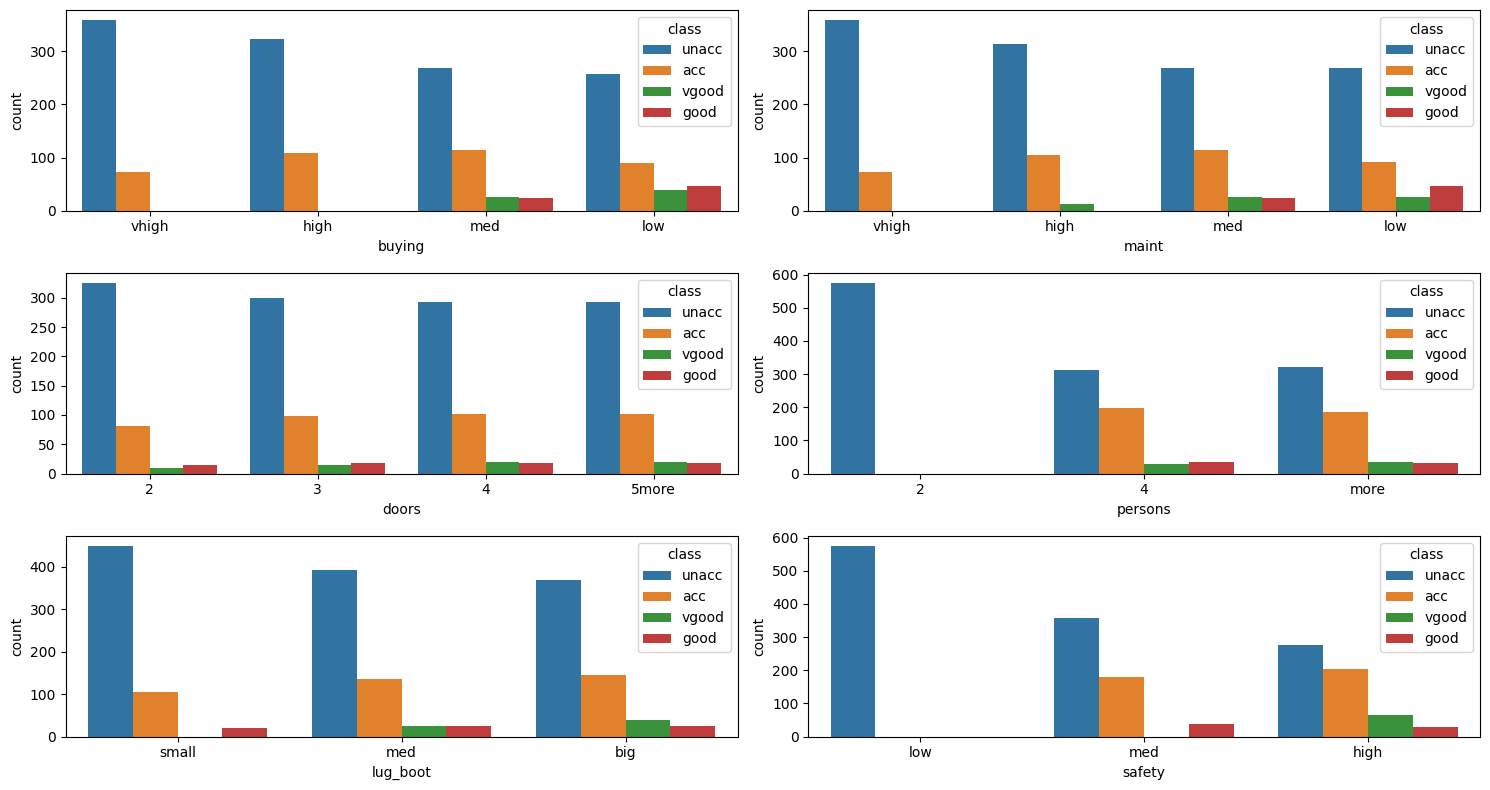

In [ ]:
# Visualizing the feature from class perspective
col_name=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
i=1
plt.figure(figsize=(15,8))
for col in col_name:
    plt.subplot(3,2,i)
    sns.countplot(data=car_data,x=col,hue='class')
    i=i+1
plt.tight_layout()

In [ ]:
X=car_data.drop('class',axis=1)
y=car_data['class']

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

In [ ]:
# cols -- is pre-define variable
encoder=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X=encoder.fit_transform(X)

In [ ]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [ ]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)


In [ ]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
#prediction on test data
y_pred_test_d=classifier.predict(X_test)

In [ ]:
accuracy_score_d=accuracy_score(y_test,y_pred_test_d)
accuracy_score_d

0.9702276707530648

In [ ]:
print(classification_report(y_test,y_pred_test_d))

              precision    recall  f1-score   support

         acc       0.95      0.91      0.93       129
        good       0.69      1.00      0.82        20
       unacc       0.99      0.99      0.99       397
       vgood       1.00      0.88      0.94        25

    accuracy                           0.97       571
   macro avg       0.91      0.95      0.92       571
weighted avg       0.97      0.97      0.97       571



In [ ]:
#Confusion Matrix - Decision Tree on test data
cm_d=confusion_matrix(y_test,y_pred_test_d)
print(cm_d)

[[118   9   2   0]
 [  0  20   0   0]
 [  3   0 394   0]
 [  3   0   0  22]]


**Random Forest Classifier :-**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
randomclassifier=RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=42)


In [ ]:
randomclassifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
y_pred_test_r=randomclassifier.predict(X_test)

In [ ]:
accuracy_score_r=accuracy_score(y_test,y_pred_test_r)
accuracy_score_r

0.968476357267951

In [ ]:
print(classification_report(y_test,y_pred_test_r))

              precision    recall  f1-score   support

         acc       0.95      0.91      0.93       129
        good       0.70      0.95      0.81        20
       unacc       1.00      0.99      0.99       397
       vgood       0.88      0.88      0.88        25

    accuracy                           0.97       571
   macro avg       0.88      0.93      0.90       571
weighted avg       0.97      0.97      0.97       571



In [ ]:
# Confusion Matrix - Random Forest Classifier on test data
cm_r=confusion_matrix(y_test,y_pred_test_r)
print(cm_r)

[[118   8   1   2]
 [  0  19   0   1]
 [  3   0 394   0]
 [  3   0   0  22]]


**Feature Importance - Random Forest Classifier**

Random Forest Classifier - will also help to find the importance of feature in dataset

In [ ]:
feature_importance=pd.Series(randomclassifier.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_importance

safety      0.295971
persons     0.225471
maint       0.165890
buying      0.165610
lug_boot    0.086995
doors       0.060062
dtype: float64

Text(0.5, 0, 'feature importance score')

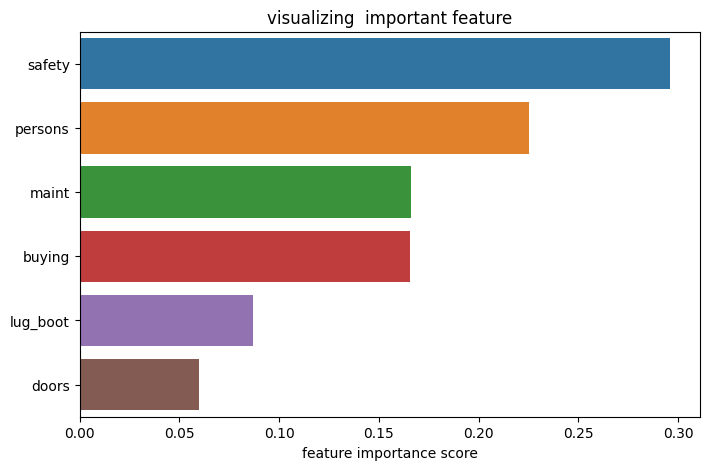

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.title('visualizing  important feature')
plt.xlabel('feature importance score')

**SVM :- Support Vefctor Machine**

SVM kernal type -


* Linear - linear
* Polynomial - poly
* RBF - Radial Basis Function (RBF) or Gaussian Kernel - rbf
* Sigmoid - sigmoid





In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_linear= SVC(kernel='linear',random_state=42)

In [ ]:
svm_linear.fit(X_train,y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_test_svm=svm_linear.predict(X_test)

In [ ]:
accuracy_score_svm=accuracy_score(y_test,y_pred_test_svm)
accuracy_score_svm

0.8546409807355516

In [ ]:
print(classification_report(y_test,y_pred_test_svm))

              precision    recall  f1-score   support

         acc       0.74      0.65      0.69       129
        good       0.77      0.85      0.81        20
       unacc       0.89      0.93      0.91       397
       vgood       0.90      0.72      0.80        25

    accuracy                           0.85       571
   macro avg       0.82      0.79      0.80       571
weighted avg       0.85      0.85      0.85       571



**Comparision - Decision Tree , Random Forest and SVM**

In [ ]:
models = pd.DataFrame({
    'Model': ['Decsion Tree', 'Random Forest','Support Vector Machines'],
    'Model Score': [accuracy_score_d, accuracy_score_r, accuracy_score_svm]})
models

,Model,Model Score
0,Decsion Tree,0.970228
1,Random Forest,0.968476
2,Support Vector Machines,0.854641


**Conclusion :-**

1] Decision Tree Accuracy :- 97%

2] Random Forest Accuracy :-96%

3] SVM Accuracy :- 85%

In comparision among all three algorithms - Decision Tree , Random Forest and SVM  is giving the best score.